## AIN429 Project
### Student Number : 2200765028

### Name Surname : Emre Çoban

### Project Title : Bank Marketing Project



Bank marketing is known for its nature of developing a unique brand image, which is treated as the capital reputation of the financial academy. It is very important for a bank to develop good relationship with valued customers accompanied by innovative ideas which can be used as measures to meet their requirements.

**What is term deposit?**
A term deposit is a fixed-term investment that includes the deposit of money into an account at a financial institution. Term deposit investments usually carry short-term maturities ranging from one month to a few years and will have varying levels of required minimum deposits.

***The investor must understand when buying a term deposit that they can withdraw their funds only after the term ends.***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px
from plotly.offline import init_notebook_mode

Input variables:
   # bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services")
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric)
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")
   # related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12 - duration: last contact duration, in seconds (numeric)
   # other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):17 - y - has the client subscribed a term deposit? (binary: "yes","no")

## Import Dataset and Summarize

In [2]:
df = pd.read_csv("bank-full.csv",sep=";")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Preprocess and Visualize

In [6]:
## Checking Missing Values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
## Number of unique rows
df.duplicated().sum()

0

<AxesSubplot:ylabel='None'>

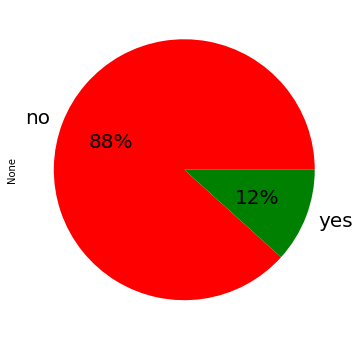

In [8]:
def label_function(val):
    return f'{val:.0f}%'

plt.figure(figsize=(6,6))
df.groupby('y').size().plot(kind='pie' ,autopct=label_function,textprops={'fontsize': 20}, colors=['red', 'green'])

### Looks like labels are not balanced so we might need to consider it later on while creating model

### We have no missing values and no duplicate rows

<AxesSubplot:ylabel='None'>

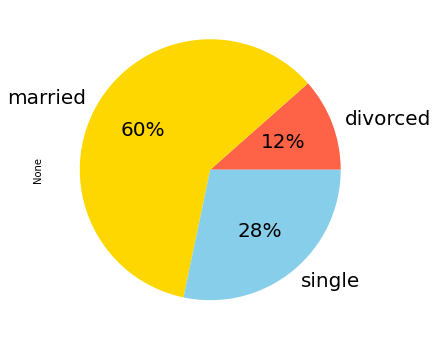

In [9]:
plt.figure(figsize=(6,6))
df.groupby('marital').size().plot(kind='pie' ,autopct=label_function ,textprops={'fontsize': 20}, colors=['tomato', 'gold', 'skyblue'])

### Our data includes more people who is married

<AxesSubplot:xlabel='balance', ylabel='marital'>

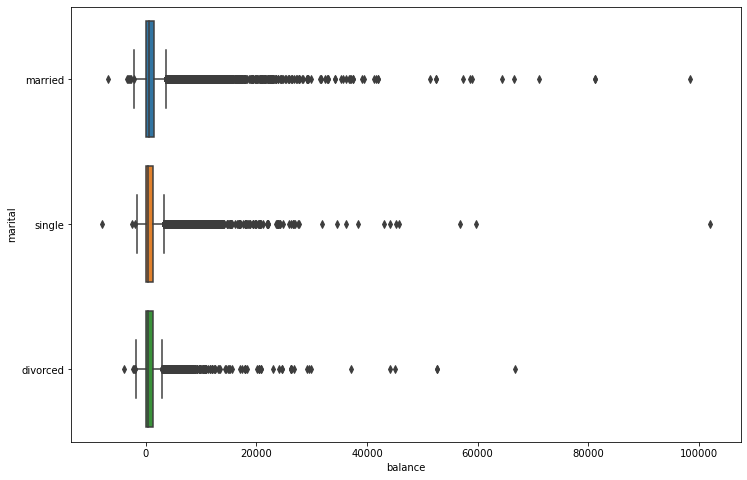

In [10]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df,x="balance",y="marital")

### Looks like divorced people has less balance but this could be because of we have less divorced people in our data. Or maybe married people are more rich

<AxesSubplot:ylabel='None'>

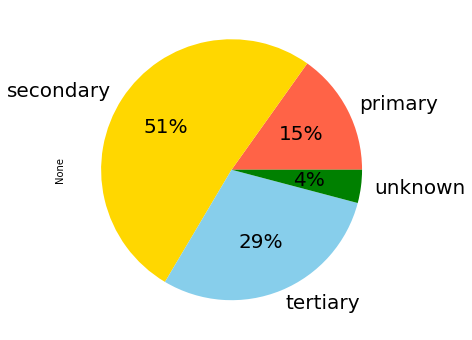

In [11]:
plt.figure(figsize=(6,6))
df.groupby('education').size().plot(kind='pie' ,autopct=label_function ,textprops={'fontsize': 20}, colors=['tomato', 'gold', 'skyblue',"green"])

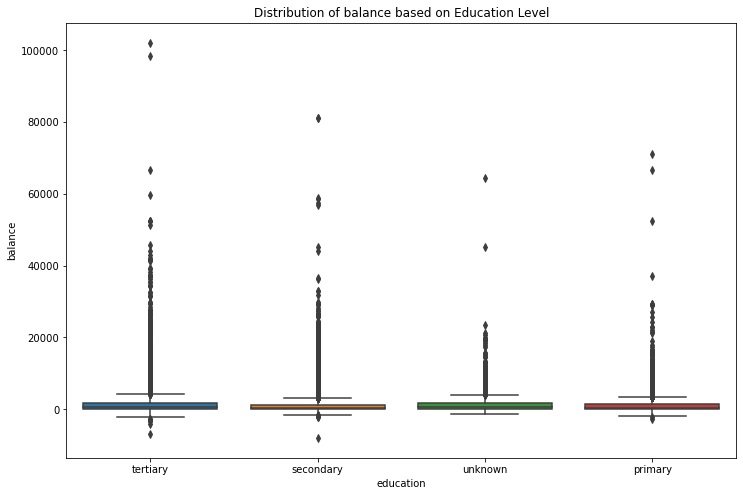

In [12]:
plt.figure(figsize=(12,8))
plt.title("Distribution of balance based on Education Level")
sns.boxplot(data=df,x="education",y="balance")
plt.show()

In [13]:
print("Mean balance of tertiary education ",df[df["education"]=="tertiary"]["balance"].mean())
print("Mean balance of secondary education ",df[df["education"]=="secondary"]["balance"].mean())
print("Mean balance of primary education ",df[df["education"]=="primary"]["balance"].mean())

Mean balance of tertiary education  1758.4164348545223
Mean balance of secondary education  1154.880786139126
Mean balance of primary education  1250.9499343161583


### Looks like when education level goes higher people are more likely to have more balance which is expected

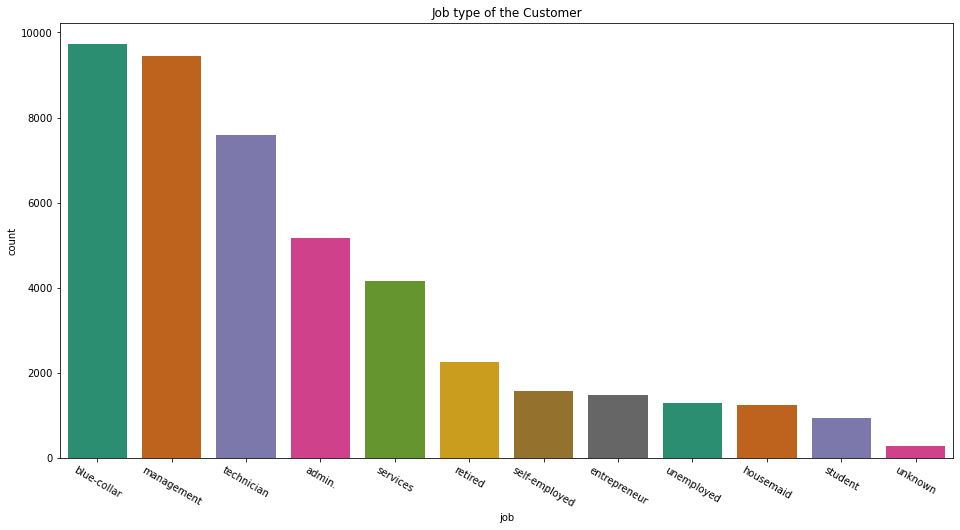

In [32]:
plt.figure(figsize=(16,8))
plt.title("Job type of the Customer")
sns.countplot(data=df,x="job",order=df['job'].value_counts().index,palette="Dark2")
plt.xticks(rotation=-30)
plt.show()

### Most of the customer are blue-collar ,management or tecnhician

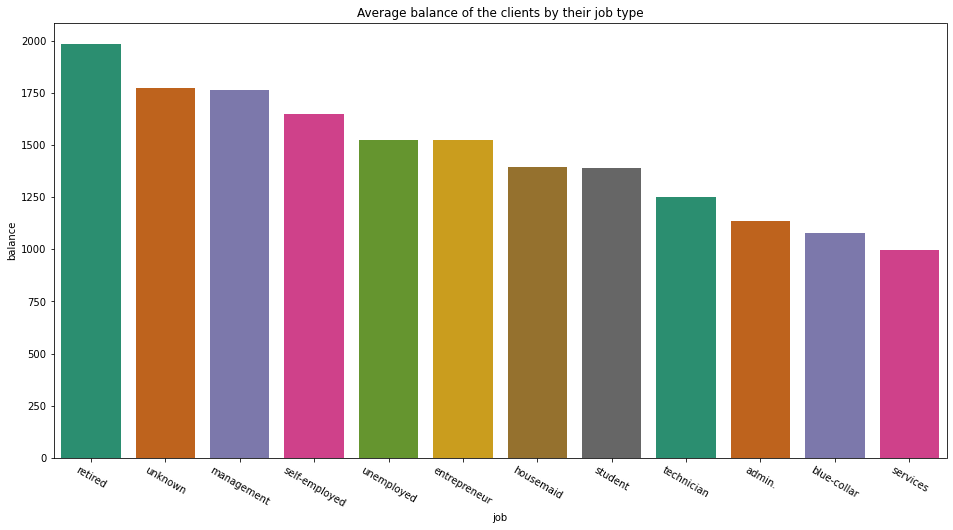

In [43]:
a = df.groupby(['job'],as_index=False)['balance'].mean()

plt.figure(figsize=(16,8))
plt.title("Average balance of the clients by their job type")
sns.barplot(data=a.sort_values(by="balance",ascending=False),x="job",y="balance",palette="Dark2")
plt.xticks(rotation=-30)
plt.show()

### Looks like retired people has the highest balance, this could be due to they spend less money 

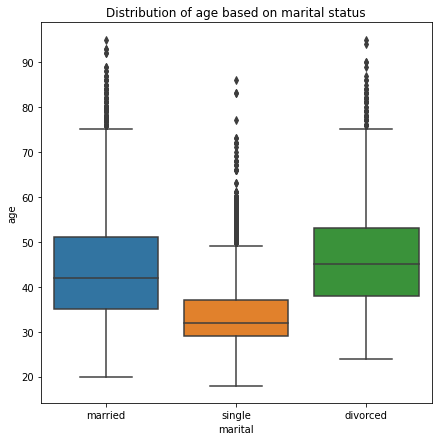

In [16]:
plt.figure(figsize=(7,7))
plt.title("Distribution of age based on marital status")
sns.boxplot(data=df,x="marital",y="age")
plt.show()

### Looks like single people are the youngest as expected

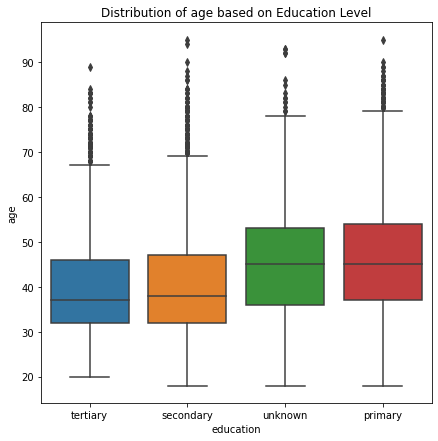

In [17]:

plt.figure(figsize=(7,7))
plt.title("Distribution of age based on Education Level")
sns.boxplot(data=df,x="education",y="age")
plt.show()

<AxesSubplot:xlabel='balance', ylabel='y'>

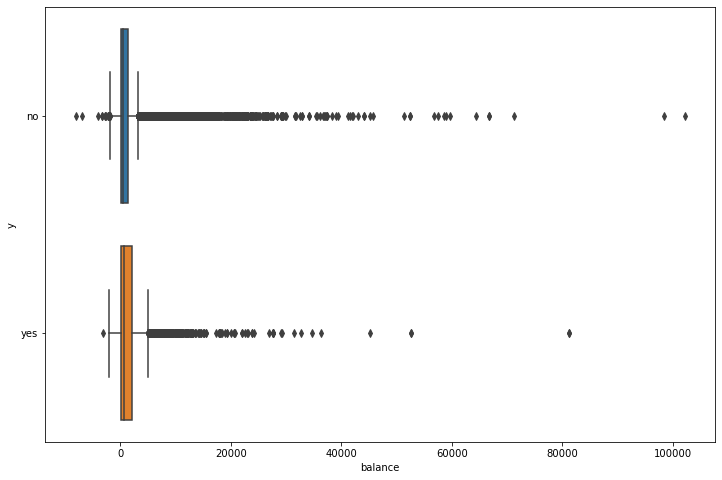

In [18]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df,x="balance",y="y")

In [19]:
print("Mean balance of those who buys deposit ",df[df["y"]=="yes"]["balance"].mean())
print("Mean balance of those who doesnt buy deposit ",df[df["y"]=="no"]["balance"].mean())


Mean balance of those who buys deposit  1804.2679145396105
Mean balance of those who doesnt buy deposit  1303.7149691899203


### Looks like those who accept deposit offer more likely to have less balance which probably because they might need the money from deposit

### This might be because of when people have more balance they dont need the money from term deposit

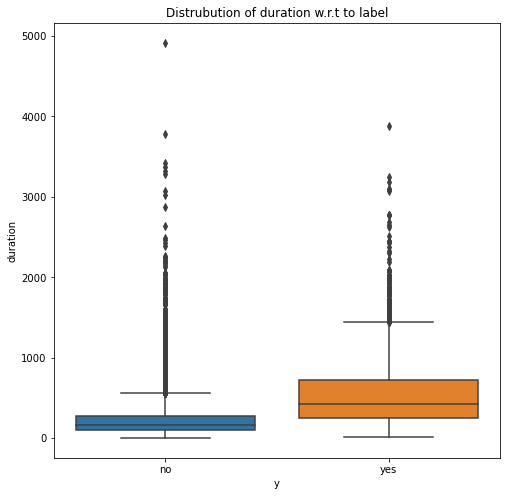

In [20]:
plt.figure(figsize=(8,8))
plt.title("Distrubution of duration w.r.t to label")
sns.boxplot(data=df,x="y",y="duration")
plt.show()

In [21]:
single = df[df["marital"]=="single"]
divorced = df[df["marital"]=="divorced"]
married = df[df["marital"]=="married"]

In [22]:
print("ratio for yes singles ",len(single[single["y"]=="yes"])/len(single))
print("ratio for yes divorced ",len(divorced[divorced["y"]=="yes"])/len(divorced))
print("ratio for yes married ",len(married[married["y"]=="yes"])/len(married))

ratio for yes singles  0.1494917904612979
ratio for yes divorced  0.11945458037257538
ratio for yes married  0.10123465863158668


<AxesSubplot:xlabel='marital'>

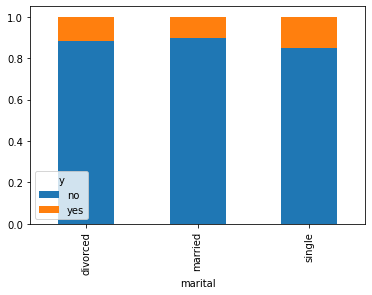

In [23]:
(pd.crosstab(df['marital'], df['y'],
             normalize='index')
 .plot.bar(stacked=True)
 )

### Looks like accepting term deposit offer ratio with respec to marital status shows us that singles are more likely to buy and married people are less likely to buy.
### This could be because of married people dont need the money from deposit

In [24]:
primary = df[df["education"]=="primary"]
unknown = df[df["education"]=="unknown"]
secondary = df[df["education"]=="secondary"]
tertiary = df[df["education"]=="tertiary"]

In [25]:
print("ratio for yes primary educa. ",len(primary[primary["y"]=="yes"])/len(primary))
print("ratio for yes secondary educa",len(secondary[secondary["y"]=="yes"])/len(secondary))
print("ratio for yes tertiary educa",len(tertiary[tertiary["y"]=="yes"])/len(tertiary))
print("ratio for yes unknown educa",len(unknown[unknown["y"]=="yes"])/len(unknown))

ratio for yes primary educa.  0.08626477886439936
ratio for yes secondary educa 0.10559434531505904
ratio for yes tertiary educa 0.15006390496955116
ratio for yes unknown educa 0.13570274636510501


<AxesSubplot:xlabel='education'>

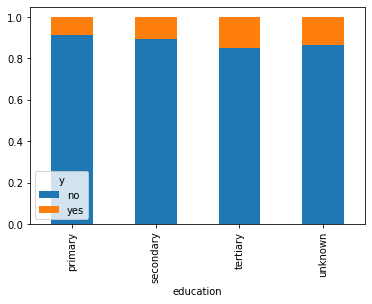

In [26]:
(pd.crosstab(df['education'],df['y'],
             normalize='index')
 .plot.bar(stacked=True)
 )

### Looks like when people are more educated they are more willing to take the offer for term deposit

<AxesSubplot:xlabel='age', ylabel='y'>

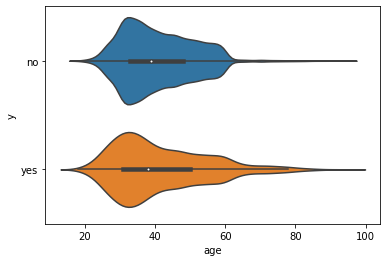

In [27]:
### Lets see correlation between age and label
sns.violinplot(data=df,x="age",y="y")

In [28]:
print("Mean age of saying yes ",df[df["y"]=="yes"]["age"].mean())
print("Mean age of saying no ",df[df["y"]=="no"]["age"].mean())

Mean age of saying yes  41.670069956513515
Mean age of saying no  40.83898602274435


### Looks like mean age of saying "no" is equals to saying "yes" but  label "yes" distrubution along higher ages 6-80 is more higher

<AxesSubplot:xlabel='loan'>

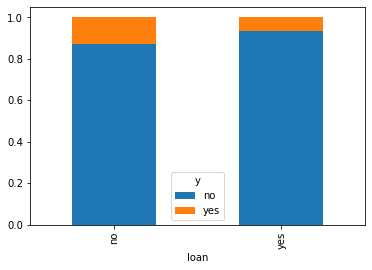

In [29]:
(pd.crosstab(df['loan'], df['y'],
             normalize='index')
 .plot.bar(stacked=True)
 )

### As a natural expectation those we have more loans are less likely to accept the deposit offer

<AxesSubplot:xlabel='job'>

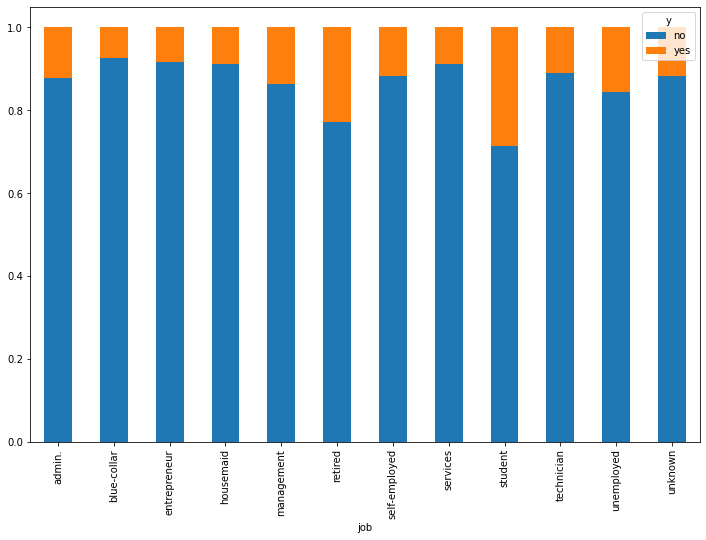

In [30]:
(pd.crosstab(df['job'], df['y'],
             normalize='index')
 .plot.bar(stacked=True,figsize=(12,8))

 )

### Looks like retired people ,technicians and students are more likely to accept term deposit offer.This could be because of students are not taking care of house so they could put their money and get montlhy paid. The rest is I cant be sure to say.Maybe retired people doesnt need cash monay and they want monthly payment from deposit account.
### entrepreneur,blue-collar and house-maids are less likely to accept term deposit offer this could be becauose of entrpreneurs need cash money to invest so they want to be able to have cash always. House-maids and blue-collars might be trying to take care home so they might not have money left for investment.

<AxesSubplot:xlabel='housing'>

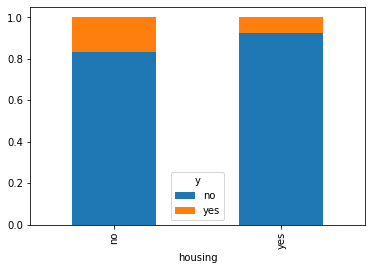

In [196]:
(pd.crosstab(df['housing'], df['y'],
             normalize='index')
 .plot.bar(stacked=True)
 )

###  Again an expected issue too if a person has housing loan he is less likely to buy deposit term.

###  I visualized my data from many aspects I think I seen what kind of relationships data has
### Now I will deal with dropping unrelevant features if any i see fit and also i will deal with outliers

## ------------------------------------------------------
## Dealing with unrelevant features

<AxesSubplot:xlabel='poutcome', ylabel='count'>

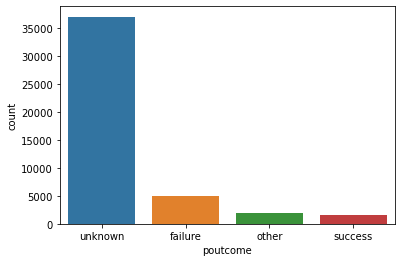

In [197]:
sns.countplot(data=df,x="poutcome")

### Looks like poutcome is mostly unknown but still gonna keep it since it gives better results

<AxesSubplot:xlabel='contact', ylabel='count'>

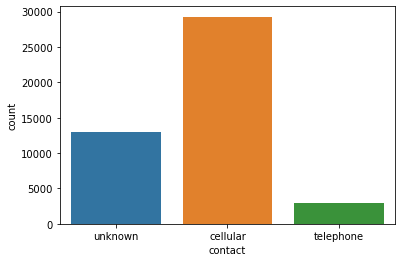

In [198]:
sns.countplot(data=df,x="contact")

<AxesSubplot:xlabel='contact'>

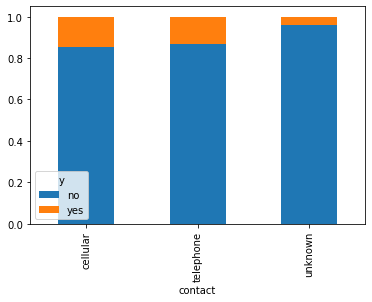

In [199]:
(pd.crosstab(df['contact'], df['y'],
             normalize='index')
 .plot.bar(stacked=True)
 )

### Unknown label might be "sms" here because it has less ratio for buying deposit.
### I first tried to drop them but not dropping it had better performance so lets keep it

### And also I think there is no reason for us keep track of last contacted day and month we can get enough information from other features such as campaign , pdays etc.

In [200]:
df = df.drop(["day","month"],axis=1)

In [201]:
len(df)

45211

### Also lets drop the rows with education is unknown and job is unknown

In [202]:
df = df[df["education"]!="unknown"]
df = df[df["job"]!="unknown"]
len(df)

43193

### So we didnt lose that much data thats cool, now we have more precise data

## -------------------------------------------------------
## Dealing with numerical data

###  Boxplots for numerical data

<AxesSubplot:xlabel='age'>

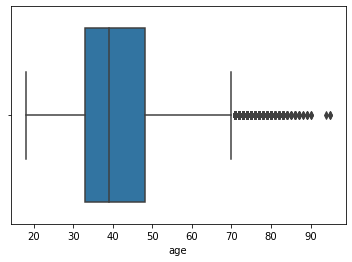

In [203]:
sns.boxplot(x = "age",data = df)

###  As we can see we have outliers but I dont plan to delete them since we can have people around age 80-90 which is normal

<AxesSubplot:xlabel='balance'>

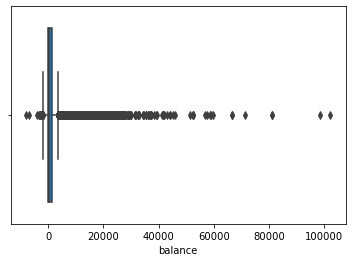

In [204]:
sns.boxplot(x="balance",data=df)

In [205]:
df["balance"].describe()

count     43193.000000
mean       1354.027342
std        3042.103625
min       -8019.000000
25%          71.000000
50%         442.000000
75%        1412.000000
max      102127.000000
Name: balance, dtype: float64

### Wow balance feature really has lots of outliers I might need to deal with them, or at least extreme outliers

### I will only delete outliers from balance feature because I dont think other features such as "age","pdays" are needed to clean from outliers

In [206]:
numerical_cols = ["balance"]

Q1 = df[numerical_cols].quantile(0.25) 
Q3 = df[numerical_cols].quantile(0.75) 

IQR = Q3 - Q1  

In [207]:
IQR

balance    1341.0
dtype: float64

In [208]:
cols = numerical_cols
df_out = df[~((df[cols] < (Q1 - 3* IQR)) |(df[cols] > (Q3 + 3* IQR))).any(axis=1)]
df_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40847 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40847 non-null  int64 
 1   job        40847 non-null  object
 2   marital    40847 non-null  object
 3   education  40847 non-null  object
 4   default    40847 non-null  object
 5   balance    40847 non-null  int64 
 6   housing    40847 non-null  object
 7   loan       40847 non-null  object
 8   contact    40847 non-null  object
 9   duration   40847 non-null  int64 
 10  campaign   40847 non-null  int64 
 11  pdays      40847 non-null  int64 
 12  previous   40847 non-null  int64 
 13  poutcome   40847 non-null  object
 14  y          40847 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.0+ MB


In [209]:
df_out.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,217,1,-1,0,unknown,no


### So we deleted extreme outliers from balance

## Now since we visualized and preprocessed our data now we are ready create our models and compare their performances


## -------------------------------------------------------------------------
# Creating Model and Fine Tuning

### Using pd.get_dummies() to deal with string values and turn everything into numerical data

In [210]:
df_out = pd.get_dummies(df_out,drop_first=True)
df_out.head()


,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,education_tertiary,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58,2143,261,1,-1,0,0,0,0,1,...,1,0,1,0,0,1,0,0,1,0
1,44,29,151,1,-1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
2,33,2,76,1,-1,0,0,1,0,0,...,0,0,1,1,0,1,0,0,1,0
5,35,231,139,1,-1,0,0,0,0,1,...,1,0,1,0,0,1,0,0,1,0
6,28,447,217,1,-1,0,0,0,0,1,...,1,0,1,1,0,1,0,0,1,0


###  Getting ready our data split , normalize etc.

In [211]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report


X = df_out[df_out.columns[:-1]]
y = df_out["y_yes"]
y = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)



scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### 1-) First Model KNN

In [212]:
from sklearn.neighbors import KNeighborsClassifier


param_grid = {'n_neighbors': [3, 5, 7 , 9]}  ## choosing odd

knn = KNeighborsClassifier(weights="distance") ## lets make it weighted
grid_search = GridSearchCV(knn, param_grid, cv=10 , return_train_score=True,verbose=1,scoring="roc_auc")

grid_search.fit(X_train[:8000], y_train[:8000]) ## taking less samples to cross validate

Fitting 10 folds for each of 4 candidates, totalling 40 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(weights='distance'),
             param_grid={'n_neighbors': [3, 5, 7, 9]}, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [213]:
# Print the best hyperparameters and the best cross-validation score
print(grid_search.best_params_)
print(grid_search.best_score_)

{'n_neighbors': 9}
0.8058239848438606


In [214]:
best_knn = grid_search.best_estimator_
accuracy = best_knn.score(X_test, y_test)
print("KNN classifier accuracy ",accuracy.round(4))

KNN classifier accuracy  0.8938


              precision    recall  f1-score   support

           0       0.91      0.98      0.94      5414
           1       0.61      0.25      0.35       714

    accuracy                           0.89      6128
   macro avg       0.76      0.61      0.65      6128
weighted avg       0.87      0.89      0.87      6128



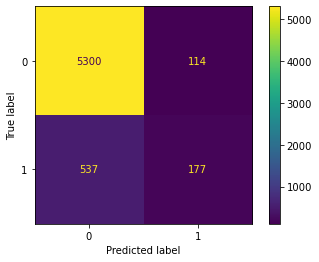

In [215]:

# Generate a confusion matrix
y_pred = best_knn.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_mat)
disp.plot()
print(classification_report(y_test,y_pred)) 

### In our KNN model we generally have good accuracy but since we are dealing with binary classification it doesnt tell that much. We have to take look at recall and precision. Our model has good preciison and recall for label "No" but for label "Yes" it has very low recall around 20 percent and precision is not so good too its around 50 percent.  

### This could be due to the class imbalance problem lets solve it by other models. Now lets move on with second model

### 2 ) Logistic Regression

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      5414
           1       0.38      0.77      0.51       714

    accuracy                           0.83      6128
   macro avg       0.67      0.80      0.70      6128
weighted avg       0.90      0.83      0.85      6128

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


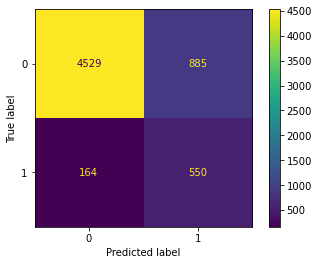

In [216]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay


logreg = LogisticRegression(solver="saga",class_weight='balanced') ## since our labels are not balanced

parameters = [ {'penalty':['l1', 'l2']},
              {'C':[10**-4, 10**-3, 10**-2, 10**-1, 1]}]



grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'roc_auc',
                           cv = 10,
                           verbose=0,)


grid_search.fit(X_train,y_train)

grid_predictions = grid_search.predict(X_test)

cm = confusion_matrix(y_test,grid_predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_search.classes_)
disp.plot()


print(classification_report(y_test,grid_predictions))#Output

print("tuned hpyerparameters :(best parameters) ",grid_search.best_estimator_.get_params())

### Precisions are pretty high but we also want to achieve more recall for sensivity

###  We had around 81 accuracy its not so good but we had good precision for "no" good recall for both labels which if we consider "yes" is less occurs so it is better to improve our chance to detect those who would say  
### But precision for predicting yes is still low lets try another model if we can also get good precision

### But it is still a good model if a bank has something like this this could make them gain so much time


### I tried some different versions but still cant make precision high, this could be due to the data might be not linearly seperable.

### So lets try some more advanced choice SVC which can handle non-lniearly seperable data

## 3-) SVC

Fitting 5 folds for each of 18 candidates, totalling 90 fits
              precision    recall  f1-score   support

           0       0.96      0.81      0.88      5414
           1       0.35      0.77      0.48       714

    accuracy                           0.81      6128
   macro avg       0.66      0.79      0.68      6128
weighted avg       0.89      0.81      0.84      6128

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.1, 'kernel': 'sigmoid', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


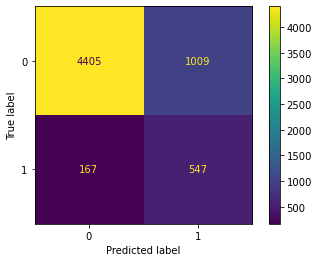

In [217]:
from sklearn.svm import SVC  



svc = SVC(class_weight="balanced")

parameters = {'C': [0.01,0.1, 1],
              'gamma': [1, 0.1],
              'kernel': ['rbf', 'poly', 'sigmoid']}

grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'roc_auc',
                           cv = 5,
                           verbose=2,
                          n_jobs=-1)


grid_search.fit(X_train[:5000],y_train[:5000])

grid_predictions = grid_search.predict(X_test)

cm = confusion_matrix(y_test,grid_predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_search.classes_)
disp.plot()


print(classification_report(y_test,grid_predictions))#Output

print("tuned hpyerparameters :(best parameters) ",grid_search.best_estimator_.get_params())

### Final F1  Scores of models are

### FOR CLASS "NO"

### KNN---LOGREG---SVC
### 0.94------0.90-------0.88


### FOR CLASS "YES"

### KNN---LOGREG---SVC
### 0.35------0.51-------0.48

### Final Accuracies   of models are
### KNN---LOGREG---SVC
### 0.89------0.83-------0.81

### -------------------------------------------


## Conclusion
### -------------------------------------------


### KNN had better accuracy then the others but since this is a binary classification with imbalanced data it is not enough. We need to take a look at recall,precision etc. to evaluate

### In the end we can say that KNN had good results for predicting class "No" but since there was class imbalance issue it was not good with class "Yes" , with the help of logistic regression we dealt that problem however we were not still having good recall,precision(f1) scores in general.
### Finally I tried SVC which could solve the issue if they are non linearly seperable data
### And this didnt work well , we had best results in logistic regression in general. It gave good f1 scores for both "no" and "yes" and an overall accuracy.


## So the final choice might depend on the need of customer. Does he want all predicted class "yes" to be "yes" or better performance at predicting class "No" etc. howevet I think that logistic regression and SVC are pretty good for evaluating a customers attitude with given features. This could help the banking industry by gaining time and knowing more about customers